array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffae4003c18>]],
      dtype=object)

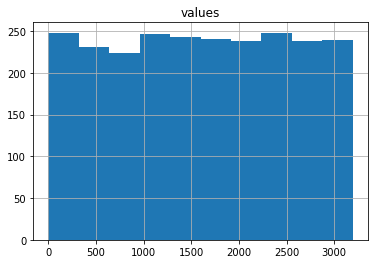

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv('/mnt/datasets/Xadrez/train-data.txt', header=None, names=['values'])
# for i in range(0,df_train.shape[0]):
#     df_train.loc[i,'another_value'] = random.randint(0,df_train.shape[0])
#df_train['another_value'] = random.randint(0,df_train.shape[0])
df_train.hist()

# O Algoritmo K-Means é um algoritmo Não Supervisionado responsável por agrupar os dados em "clusters", 
# o algoritmo se baseia na distância euclidiana entre os datapoints no conjunto de dados, o K é um parâmetro
# utilizado para definir o número de "clusters".
# Para desenvolver o algoritmo K-Means é preciso seguir 3 passos básicos:
#    1 - Analisar a base de dados, observando a necessidade de normalizar ou escalar os dados de modo a facilitar os cálculos da distância 
#    2 - Determinar o cálculo de distância, neste trabalho utilizaremos a distância euclidiana
#    3 - Determinar a inicialização dos centroides
#    4 - Calcular a diferença de cada ponto até o centroide, definindo a qual centroide cada ponto de dado pertence
#    5 - Recalcular os centroides utilizando a média de distância entre todos os pontos do cluster, repetir esse passo até que o valor entre 
# o centroide antigo e o centroide novo seja maior que um limiar ou que n iterações sejam alcançadas.


In [17]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/1/10/Euclidean_distance_3d_2_cropped.png", width=400,height=400)


Iteration #1
Iteration #2
Iteration #3
Iteration #4
Iteration #5
Iteration #6
Iteration #7
Iteration #8
Iteration #9
Iteration #10
Iteration #11
Iteration #12
Iteration #13
Iteration #14
Iteration #15
Iteration #16
Iteration #17
Iteration #18
Iteration #19
Iteration #20
Iteration #21
Iteration #22
Iteration #23
Iteration #24
Iteration #25
Iteration #26
Iteration #27
Iteration #28
Iteration #29
Iteration #30
Iteration #31
Iteration #32
Iteration #33
Iteration #34
Iteration #35
Iteration #36
Iteration #37
Iteration #38
Iteration #39
Iteration #40
Iteration #41
Iteration #42
Iteration #43
Iteration #44
Iteration #45
Iteration #46
Iteration #47
Iteration #48
Iteration #49
Iteration #50
Iteration #51
Iteration #52
Iteration #53
Iteration #54
Iteration #55
Iteration #56
Iteration #57
Iteration #58
Iteration #59
Iteration #60
Iteration #61
Iteration #62
Iteration #63
Iteration #64


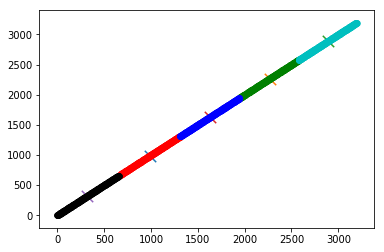

In [18]:
import random
import numpy as np
class Kmeans(object):
    
    def __init__(self, k = 3, min_distance = 0.0001):
        self.k = k
        # Minimum Threshold from old_centroid to new_centroid
        self.min_distance = min_distance
        
    def fit(self, df, iterations=500):
        # Initialize the Centroids at Random
        data = df.to_numpy()

        self.centroids = [data[random.randint(0,len(data))] for i in range(self.k)]
        
        classes = [[] for c in range(self.k)]
        converged = False
        iteration = 0
        
        while(converged==False and iteration < iterations):
            
            classes = [[] for i in range(self.k)]
            
            for row in data:
                dist_list = [self.euclidean_distance(row, c) for c in self.centroids]
                classification = dist_list.index(min(dist_list))
                classes[classification].append(row)

            previous_centroids = [c for c in self.centroids]
            for idx, c in enumerate(classes):
                self.centroids[idx] = np.average(c,axis = 0)

            converged = True
            
            for idx, c in enumerate(classes):
                previous_centroid = previous_centroids[idx]
                new_centroid = self.centroids[idx]
                if np.sum((new_centroid - previous_centroid)/previous_centroid * 100.0) > self.min_distance:
                    converged = False    
                    
            iteration += 1
            print("Iteration #"+str(iteration))
            
        self.classes=classes
    
    def predict(self, x):
        x_pred = x.to_numpy()
        dist_list = [self.euclidean_distance(x_pred, c) for c in self.centroids]
        classification = dist_list.index(min(dist_list))
        return classification
    
    def euclidean_distance(self, p, q):
        dist = 0
        dist = np.linalg.norm(p-q)
        return dist
        
km = Kmeans(5)
km.fit(df_train)

# Plotting starts here, the colors
colors = 10*["r", "g", "c", "b", "k"]

for idx, centroid in enumerate(km.centroids):
    plt.scatter(km.centroids[idx][0], km.centroids[idx][0], s = 130, marker = "x")

for idx, _class in enumerate(km.classes):
    color = colors[idx]
    for row in _class:
        plt.scatter(row[0], row[0], color = color,s = 30)
        
plt.show()

        